<a id="1.1"></a>
<h2 style="font-family:arial;text-align:center; font-size: 40px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:lightblue; background-color: #ffffff;"> <b>HDIP DATA ANALYTICS</b></h2>

<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:lightblue;overflow:hidden"><b>MACHINE LEARNING FOR BUSINESS | SEM 2</b></div>

Lecturer(s): Dr. Muhammad Iqbal

Issue Date: 14th September 2023

Submission Deadline Date: 5th November 2023

Students: **_Bárbara Abreu Costa 2023099_** | **_Juliana Cristina da Cunha Brum 2023021_** 

GitHub Repository: https://github.com/JulianaCBrum/MACHINE-LEARNING-

-----

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">FLIGHT PRICE</p>

**_Quick overview of our dataset_** 

> This is a dataset found on Kaggle that contains informations about flight booking options avaiable through the website Easymytrip for flights between the top 6 metropolises in India. Data had been collected in two stages: for business calss ticket and for economy class ticket. The site provided a total 300.261 unique fligh booking possibilities, from February 11 to March 31 of 2022. 

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">DICTIONARY</p>

|STT | ATTRIBUTE NAME | MEANING |
|:---| :--- |:--- |
| 0 | Date
| 1 | Airline | The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
| 2 | Flight | Flight stores information regarding the plane's flight code. It is a categorical feature.
| 3 | Source City | City from which the flight takes off. It is a categorical feature having 6 unique cities.
| 4 | Departure Time |This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
| 5 | Stops | A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
| 6 | Arrival Time | This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
| 7 | Destination City | City where the flight will land. It is a categorical feature having 6 unique cities.
| 8 | Class | A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
| 9 | Duration | A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
| 10 | Days Left | This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
| 11 | Price | Target variable stores information of the ticket price.

-----

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Undertanding our data

In [ ]:
df = pd.read_csv('business.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

> To ensure data quality and avoid misleading or redundant information, I'll dropping duplicate rows 

In [ ]:
df.duplicated().sum()

Some columns are irrelevant for our analysis, so I am going to drop them. 

In [ ]:
df1 = df.drop(['ch_code', 'num_code', 'dep_time', 'stop', 'arr_time'], axis=1)
df1.head()

##### Business Airline by count

In [ ]:
value_counts = df1['airline'].value_counts()
print(value_counts)

    We have only two airlines in the dataset: Vistara and Air India 

In [ ]:
# Calculate value counts
value_counts = df1['airline'].value_counts()

# Plot the value counts
value_counts.plot(kind='bar', color='skyblue')
plt.title('Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.show()

In [ ]:
from_counts = df1['from'].value_counts()
to_counts = df1['to'].value_counts()

# Create a grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(from_counts))

rects1 = ax.bar(index, from_counts, bar_width, label='From', color='skyblue')
rects2 = ax.bar(index, to_counts, bar_width, label='To', color='lightgreen', alpha=0.7)

ax.set_xlabel('Locations')
ax.set_ylabel('Counts')
ax.set_title('Counts of "From" and "To" Locations')
ax.set_xticks(index)
ax.set_xticklabels(from_counts.index)
ax.legend()

plt.show()







##### Prices distribuition

In [ ]:
sns.displot(df1['price'],color='green',kde=True)

In [ ]:
df1.head()

In [ ]:
# Remove non-numeric characters from the 'price' column
df1['price'] = df1['price'].str.replace(',', '').astype(float)

# Print the DataFrame with the converted 'price' column
df1.head()

In [ ]:
# Convert 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Group the data by day and calculate the mean for each day
df1_daily_mean = df1.groupby(df1['date'].dt.date)['price'].mean()

# Print the aggregated DataFrame
df1_daily_mean

In [ ]:
df1_daily_mean = df1_daily_mean.reset_index()

In [ ]:

df1_daily_mean['date'] = pd.to_datetime(df1_daily_mean['date'])

In [ ]:
merged_df = pd.merge(df1, df1_daily_mean, on='date', how='left')

merged_df.head()

In [ ]:
# Group by 'date' and aggregate the other columns
grouped_df = merged_df.groupby('date').agg({'airline': 'first', 'from': 'first', 'time_taken': 'first', 'to': 'first', 'price_x': 'mean', 'price_y': 'mean'})

# Reset the index to transform 'date' into a regular column
grouped_df = grouped_df.reset_index()

# Print the aggregated DataFrame
grouped_df.head()

In [ ]:
# Drop the 'price_y' column from the DataFrame
grouped_df.drop('price_y', axis=1, inplace=True)
grouped_df.head(50)

In [ ]:
# Convert the 'Date' column to datetime format
grouped_df['date'] = pd.to_datetime(grouped_df['date'])

# Filter rows for February and March
grouped_df = grouped_df[(grouped_df['date'].dt.month == 2) | (grouped_df['date'].dt.month == 3)]

# If you want to reset the index after dropping rows, you can use the following command
df_timeseries = grouped_df.reset_index(drop=True)

df_timeseries.head()

In [ ]:
# Convert the 'date' column to a datetime type
df_timeseries['date'] = pd.to_datetime(df_timeseries['date'])

# Set the 'date' column as the index
df_timeseries.set_index('date', inplace=True)

# Print the DataFrame to verify the changes
df_timeseries.head(50)

In [ ]:
df_timeseries.plot()

In [ ]:
# Filter the data for the months of February and March in the year 2022
df_feb_mar_2022 = df_timeseries['2022-02':'2022-03']

# Plotting a bar chart for February and March
plt.figure(figsize=(14, 8))  # Adjusting the figure size
df_feb_mar_2022.plot(kind='bar', color='skyblue')  # Setting the color of the bars

plt.title('February and March 2022', fontsize=16)  # Setting the title and its font size
plt.xlabel('Date', fontsize=12)  # Setting the x-axis label and its font size
plt.ylabel('Values', fontsize=12)  # Setting the y-axis label and its font size
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for better visualization

plt.show()

In [ ]:
# first test, informally, plot the moving average
# note the ROLLING function
# air_passengers.rolling(window = 60).mean().plot()
df_timeseries.rolling(window = 7).mean().plot()

In [ ]:
df_timeseries.rolling(window = 15).mean().plot()

In [ ]:
from statsmodels.tsa.stattools import acf

# How should you size your window?
df_timeseries.rolling(window = 7).var().plot()

In [ ]:
log_price = df_timeseries.price_x.apply(lambda x: np.log(x))
log_price.plot()

In [ ]:
# What if we subtract this rolling mean from the original series?
rolling_mean = df_timeseries.rolling(window = 7).mean()

# Subtract rolling_mean from the air_passengers
price_detrended = df_timeseries - rolling_mean

# Display the plot
price_detrended.plot()

In [ ]:
log_rolling_mean = log_price.rolling(window = 7).mean()
log_detrended = log_price - log_rolling_mean
log_detrended.plot()

In [ ]:
log_price_diff = log_price - log_price.shift()
log_price_diff.plot()

Dicky Fuller Test - to see if the data is stationary or not. 

In [ ]:
df_timeseries.head()

In [ ]:
series = df_timeseries['price_x'].values
series

My data is stationary, as we can see in Dickey-Fuller test

In [ ]:
from  statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag = 'AIC')

In [ ]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(df_timeseries['price_x'])

# Display the results
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

Baseline model - arithmetic mean

In [ ]:
# Split the data into training and test sets
train = df_timeseries.iloc[:-7]  # Use all data except the last 2 weeks for training
test = df_timeseries.iloc[-7:]  # Last 2 weeks data for testing

# Create a DataFrame for the Mean_Forecast for the next two weeks
date_range = pd.date_range(start=test.index[0], periods=len(test) + 7, freq='D')[len(test):]
df_forecast = pd.DataFrame(index=date_range, data={'Mean_Forecast': [mean_value]*len(date_range)})

# Plot the training data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price_x'], label='Training Data', marker='o')

# Plot the test data
plt.plot(test.index, test['price_x'], label='Test Data', marker='o')

# Plot the forecast for the next two weeks
plt.plot(df_forecast.index, df_forecast['Mean_Forecast'], label='Mean Forecast', linestyle='--')

# Plot settings
plt.title('Time Series Data with Mean Forecast for the Next Two Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Naive seasonal forecast 

In [ ]:
# Split the data into training and test sets
train = df_timeseries.iloc[:-14]  # Use all data except the last 2 weeks for training
test = df_timeseries.iloc[-14:]  # Last 2 weeks data for testing

# Compute the seasonal naive forecast for the next week
season_length = 14  # Assuming the season length is 14 days
forecast = df_timeseries['price_x'].iloc[-season_length:]

# Create the index for the forecast period
forecast_index = pd.date_range(start=df_timeseries.index[-1], periods=7, freq='D')

# Plot the training data, test data, and the seasonal naive forecast for the next week
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price_x'], label='Training Data', marker='o')
plt.plot(test.index, test['price_x'], label='Test Data', marker='o')
plt.plot(forecast_index, forecast.values[-7:], label='Seasonal Naive Forecast', linestyle='--')  # Selecting the last 7 values

# Plot settings
plt.title('Time Series Data with Seasonal Naive Forecast for the Next Week', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


ARMA time series - because the data is stationary. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert the time series data to a numeric type if needed
df_timeseries['price_x'] = pd.to_numeric(df_timeseries['price_x'], errors='coerce')

# Assuming 'df_timeseries' is your time series data
p = 2  # Replace with the appropriate value
q = 1  # Replace with the appropriate value

# Define the parameters for the ARMA model
order = (p, 0, q)  # Here, 'd' is set to 0 for the ARMA model

# Fit the ARMA model
model = ARIMA(df_timeseries['price_x'], order=order)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot the original data and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(model_fit.fittedvalues, label='Fitted Values', linestyle='--')
plt.title('ARMA Model Fit to Time Series Data', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


ARIMA model 

In [ ]:

from statsmodels.tsa.arima.model import ARIMA

# Convert the time series data to a numeric type if needed
df_timeseries['price_x'] = pd.to_numeric(df_timeseries['price_x'], errors='coerce')

# Assuming 'df_timeseries' is your time series data
p = 2  # Replace with the appropriate value
d = 1  # Replace with the appropriate value
q = 1  # Replace with the appropriate value

# Define the parameters for the ARIMA model
order = (p, d, q)

# Fit the ARIMA model
model = ARIMA(df_timeseries['price_x'], order=order)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot the original data and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(df_timeseries.index, df_timeseries['price_x'], label='Original Data', marker='o')
plt.plot(model_fit.fittedvalues, label='Fitted Values', linestyle='--')
plt.title('ARIMA Model Fit to Time Series Data', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df_timeseries' is your time series data
p = 2  # Replace with the appropriate value
d = 1  # Replace with the appropriate value
q = 1  # Replace with the appropriate value

# Define the parameters for the ARIMA model
order = (p, d, q)

# Fit the ARIMA model
model = ARIMA(df_timeseries['price_x'], order=order)
model_fit = model.fit()

# Get forecast for the next 10 time points (for example)
forecast = model_fit.get_forecast(steps=7)

# Print the forecasted values and confidence intervals
print(forecast.predicted_mean)
print(forecast.conf_int())


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Get the predictions
predictions = model_fit.get_prediction(start=0, end=len(df_timeseries)-1)
predicted_values = predictions.predicted_mean

# Calculate MSE and MAE
mse = mean_squared_error(df_timeseries['price_x'], predicted_values)
mae = mean_absolute_error(df_timeseries['price_x'], predicted_values)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


In [ ]:
df_timeseries.head(50)

> Since my partner choce to focusing on 'time series' analysis I decided to applied clustering.
>
> Between the avaibles features in our dataset such as 'airline', 'from' and 'to' I will experiment differents combiantions to see what yields can be the most meaningful cluster

<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">BARBARA'S APPROCHE</p>

> Reading our dataset again to start new approache. A different cleaning metod will be used. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('business.csv')

In [3]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
df.shape

(93487, 11)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

> Describe about shape, duplicates and missing values

In [7]:
df2 = df.drop(['ch_code', 'num_code', 'time_taken', 'dep_time', 'arr_time'], axis=1)

> In that case I will keep 'stop' column to check the correlation beteween number of stops and price

> Here I decided to impute numerical values to 'stop' column

In [8]:
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("non-stop","0",regex=True)
df2["stop"]=df2["stop"].replace("2+-stop","2", regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True) 
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)            
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)           
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)           
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)                
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)              
df2["stop"]=df2["stop"].replace("1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia HYD\n\t\t\t\t\t\t\t\t\t\t\t\t","1",regex=True)               

In [9]:
df2

,date,airline,from,stop,to,price
0,11-02-2022,Air India,Delhi,0,Mumbai,"25,612"
1,11-02-2022,Air India,Delhi,0,Mumbai,"25,612"
2,11-02-2022,Air India,Delhi,1,Mumbai,"42,220"
3,11-02-2022,Air India,Delhi,1,Mumbai,"44,450"
4,11-02-2022,Air India,Delhi,1,Mumbai,"46,690"
...,...,...,...,...,...,...
93482,31-03-2022,Vistara,Chennai,1,Hyderabad,"69,265"
93483,31-03-2022,Vistara,Chennai,1,Hyderabad,"77,105"
93484,31-03-2022,Vistara,Chennai,1,Hyderabad,"79,099"
93485,31-03-2022,Vistara,Chennai,1,Hyderabad,"81,585"


##### Convert remaining "categorical" values to "numerical" values

In [10]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [14]:
df2["airline"] = lab_enc.fit_transform(df2["airline"])
df2["from"] = lab_enc.fit_transform(df2["from"])
df2["to"] = lab_enc.fit_transform(df2["to"])
df2["date"] = lab_enc.fit_transform(df2["date"])

In [12]:
df2

,date,airline,from,stop,to,price
0,10,0,2,0,5,"25,612"
1,10,0,2,0,5,"25,612"
2,10,0,2,1,5,"42,220"
3,10,0,2,1,5,"44,450"
4,10,0,2,1,5,"46,690"
...,...,...,...,...,...,...
93482,48,1,1,1,3,"69,265"
93483,48,1,1,1,3,"77,105"
93484,48,1,1,1,3,"79,099"
93485,48,1,1,1,3,"81,585"


In [ ]:
# Encontrar codigo para plot de correlacao

In [ ]:
# ! Relation between number of stops for a flight and the flight ticket price

##### MACHINE LEARNING MODEL

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert date to datetime
df2['date'] = pd.to_datetime(df2['date'])

# Remove commas and convert 'price' column to numeric
df2['price'] = df2['price'].str.replace(',', '').astype(float)

# Encode categorical variables
label_encoder = LabelEncoder()
df2['airline'] = label_encoder.fit_transform(df2['airline'])
df2['from'] = label_encoder.fit_transform(df2['from'])
df2['stop'] = label_encoder.fit_transform(df2['stop'])
df2['to'] = label_encoder.fit_transform(df2['to'])

# Split data into features (X) and target (y)
X = df2[['airline', 'from', 'stop', 'to']]
y = df2['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### RANDOM FOREST REGRESSOR

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2}')


Mean Absolute Error: 5474.8452827041465
Mean Squared Error: 62776506.414712064
R-squared: 0.6287906836999934


##### MAKE PREDICTION

In [70]:
# Example prediction
rf_data = [[5, 2, 0, 3]]  # Replace with actual feature values
predicted_price = model.predict(rf_data)
print(f'Random Forest Regressor Predicted Price: {predicted_price[0]}')

Random Forest Regressor Predicted Price: 68342.17138659718


C:\Users\barba\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


> Where: 
> 
> * 1 represents the airline 
> * 2 represents the departure city.
> * 0 represents the number of stops.
> * 3 represents the destination city.
>
> Assuming it's encoded in the same way as in the training data

##### SUPPORT VECTOR REGRESSION (SVR)

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df2[['from', 'stop', 'to']] = scaler.fit_transform(df2[['from', 'stop', 'to']])

In [20]:
from sklearn.svm import SVR

# Initialize the SVR model
model_svr = SVR(kernel='rbf')  # You can try different kernels ('linear', 'poly', etc.)

# Train the model
model_svr.fit(X_train, y_train)

SVR()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred_svr = model_svr.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Mean Absolute Error: {mae_svr}')
print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R-squared: {r2_svr}')


SVR Mean Absolute Error: 9368.520544731502
SVR Mean Squared Error: 162261580.67637005
SVR R-squared: 0.040516685864543156


##### MAKE PREDICTION

In [72]:
srv_data = [[5, 2, 0, 3]]
predicted_price_svr = model_svr.predict(srv_data)
print(f'SVR Predicted Price: {predicted_price_svr[0]}')

SVR Predicted Price: 53965.72732138413


C:\Users\barba\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


##### XGBOOST

In [41]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
model_xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

Evaluate the Model 

In [44]:
# Predict prices on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

XGBoost Mean Absolute Error: 5474.394282643866
XGBoost Mean Squared Error: 62765145.32702924
XGBoost R-squared: 0.628857863953117


#### K-NEAREST NEIGHBORS REGRESSOR

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Nearest Neighbors model
model_knn = KNeighborsRegressor(n_neighbors=5) 

# Train the model
model_knn.fit(X_train, y_train)


KNeighborsRegressor()

In [46]:
# Assuming you have already trained the K-Nearest Neighbors Regressor model (model_knn) and have the test set (X_test, y_test)

# Predict prices on the test set
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'K-Nearest Neighbors Mean Absolute Error: {mae_knn}')
print(f'K-Nearest Neighbors Mean Squared Error: {mse_knn}')
print(f'K-Nearest Neighbors R-squared: {r2_knn}')

K-Nearest Neighbors Mean Absolute Error: 6239.539726173922
K-Nearest Neighbors Mean Squared Error: 79327047.10243878
K-Nearest Neighbors R-squared: 0.5309242167051582


##### MAKE PREDICTION

In [74]:
knn_data = [[5, 2, 0, 3]]
predicted_price_knn = model_knn.predict(knn_data)
print(f'KNN Predicted Price: {predicted_price_knn[0]}')

KNN Predicted Price: 71017.2


C:\Users\barba\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;color:BLACH;font-family:arial;font-size:100%;text-align:left;overflow:hidden;font-weight:500">LINEAR REGRESSION</p>

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df2['airline_code'] = label_encoder.fit_transform(df2['airline'])
df2['from_code'] = label_encoder.fit_transform(df2['from'])
df2['to_code'] = label_encoder.fit_transform(df2['to'])


Define Features (X) and Target (y)

In [31]:
features = ['airline_code', 'from_code', 'to_code', 'stop']
X = df2[features]
y = df2['price']


Split Data into Training and Testing Sets

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Initialize and Train the Linear Regression Model

In [61]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

LinearRegression()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict prices on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 7388.298814235743
Mean Squared Error: 94139027.74369104
R-squared: 0.44333818299749683


##### MAKE PREDICTION

In [63]:
LR_data = [[5, 2, 0, 3]]  
predicted_price = model_lr.predict(LR_data)
print(f'Linear Regression Predicted Price: {predicted_price[0]}')

Linear Regression Predicted Price: 108844.78468260038


C:\Users\barba\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<a id="1"></a>
## <p style="padding:10px;background-color:lightblue;margin:0;color:black;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">COMPARING MODELS</p>

In [76]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Initialize models
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_svr = SVR(kernel='rbf')
model_lr = LinearRegression()
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_knn = KNeighborsRegressor(n_neighbors=5)

# List of models for iteration
models = [model_rf,model_svr,model_lr,model_xgb,model_knn]
model_names = ['Random Forest', 'SVR', 'Linear Regression', 'XGBoost', 'KNN']

# Train and evaluate models
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Metrics for {name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-" * 30)


Metrics for Random Forest:
Mean Absolute Error: 5474.8452827041465
Mean Squared Error: 62776506.414712064
R-squared: 0.6287906836999934
------------------------------
Metrics for SVR:
Mean Absolute Error: 9207.049868918763
Mean Squared Error: 152998831.21859634
R-squared: 0.09528906951016469
------------------------------
Metrics for Linear Regression:
Mean Absolute Error: 7388.298814235743
Mean Squared Error: 94139027.74369104
R-squared: 0.44333818299749683
------------------------------
Metrics for XGBoost:
Mean Absolute Error: 5474.394282643866
Mean Squared Error: 62765145.32702924
R-squared: 0.628857863953117
------------------------------
Metrics for KNN:
Mean Absolute Error: 6239.539726173922
Mean Squared Error: 79327047.10243878
R-squared: 0.5309242167051582
------------------------------


<a id="1"></a>
### <p style="padding:10px;background-color:lightblue;margin:0;color:BLACH;font-family:arial;font-size:100%;text-align:left;overflow:hidden;font-weight:500">CLUSTER</p>

In [21]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import skfuzzy as fuzz

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [26]:
# Define the number of clusters
n_clusters = 3  

# Apply FCM
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_pca.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
)

In [27]:
# Determine the most likely cluster for each data point
cluster_membership = np.argmax(u, axis=0)


In [28]:
# Visualize the Clusters 

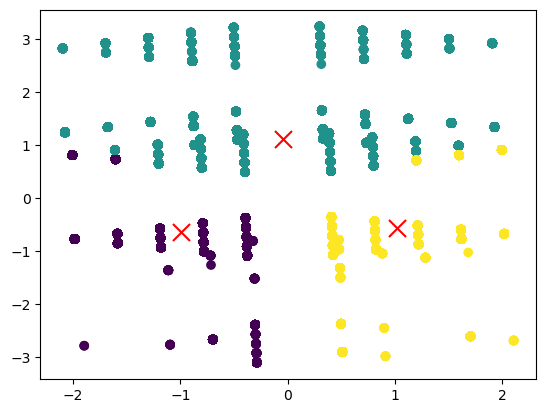

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_membership, cmap='viridis')
plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', s=150, c='r')
plt.show()


<a id="1"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:white;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">REFERENCES</p>

(TO EDIT LATER)
! add here all the refereces you have used

Dataset: 
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction